<a href="https://colab.research.google.com/github/raul-rufato/smt/blob/newsmt/tutorial/SMT_MixedInteger_application.ipynb" target="_blank" rel="nofollow"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

# Augmented LHS Documentation for the Toolbox SMT

<div class="jumbotron text-left"><b>
The French Aerospace Lab ONERA <br/>
Information Processing and Systems Department (DTIS) <br/>
Multidisciplinary Methods, Integrated Concepts (M2CI) Research Unit <br/>
</div>

Rubén CONDE ARENZANA ONERA/DTIS/M2CI
    
**Latest update:** May 2023 - version 2.0

In this notebook, we present some examples in order to use the augmented LHS functionality within the Toolbox SMT

<div class="alert alert-info fade in" id="d110">
<p>Latest updates</p>
<ol> - add possibility to extand a LHS for mixed integer or categorical variables with DesignSpace </ol>
</div>

<p class="alert alert-success" style="padding:1em">
To use SMT models, please follow this link: https://github.com/SMTorg/SMT/blob/master/README.md. The documentation is available here: http://smt.readthedocs.io/en/latest/
</p>


**Reference paper:** https://www.semanticscholar.org/paper/Adaptive-Response-Surface-Method-Using-Inherited-Wang/cb3505730d406b2baae25b34fa3fa74058461592

Cite us:

M.-A. Bouhlel, J. T. Hwang, N. Bartoli, R. Lafage, J. Morlier, J .R.R.A Martins (2019), A Python surrogate modeling framework with derivatives, Advances in Engineering Software, 102662


## Problem Statement 

The generation of optimized design of experiments (DoE) is an essential tool when dealing with the analysis and simulation processes that are computationally expensive. In this regard, Latin Hypercube Samplings (LHS) appears to be a sampling method that can cope with many input variables ensuring that each of them has all portions of its range represented. Additionally, this method is computionally cheap to generate. 

In this document, an expanded LHS is presented. To understand this functionality, we can start with a 2D LHS that counts on 10 points. For some purposes, for instance adaptive design or nested designs, it is necessary to add new points to the DoE but keeping the ensemble LHS. For the moment, we can just add a multiple of the initial number of points to ensure an LHS (in this example case we can add 10,20,30... points).


## Initial LHS Sampling

Firstly, we create a LHS sampling in 4D that will be the initial LHS to be augmented

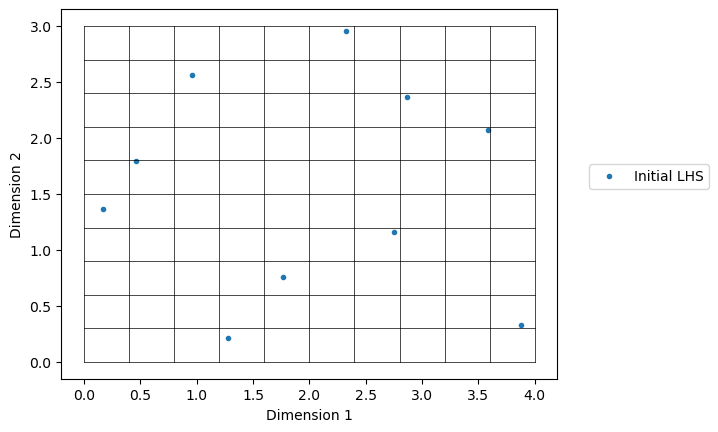

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS
import matplotlib.patches as patches

import warnings
warnings.filterwarnings("ignore")

xlimits = np.array([[0.0, 4.0], [0.0, 3.0], [0.0, 3.0], [1.0, 5.0]])
sampling = LHS(xlimits=xlimits, criterion='ese', random_state=1)

num = 10
x = sampling(num)


### For visualization only

intervals = []  
subspace_bool = []
for i in range(len(xlimits)):  
    intervals.append(np.linspace(xlimits[i][0],xlimits[i][1],num+1))
    subspace_bool.append([[intervals[i][j]<x[kk][i]<intervals[i][j+1] 
    for kk in range(len(x))] for j in range(len(intervals[i])-1)])
    
PLOT1 = 0 #First dimension to be depicted
PLOT2 = 1 #Second dimension to be depicted

fig, ax = plt.subplots(1)
ax.plot(x[:, PLOT1], x[:, PLOT2], ".")
for i in range(len(intervals[0])):
    ax.plot([intervals[PLOT1][i], intervals[PLOT1][i]], [intervals[PLOT2][0],intervals[PLOT2][-1]], linewidth=0.5,color='k')
    ax.plot([intervals[PLOT1][0], intervals[PLOT1][-1]], [intervals[PLOT2][i],intervals[PLOT2][i]], linewidth=0.5,color='k')
ax.set_xlabel("Dimension " + str(PLOT1+1))
ax.set_ylabel("Dimension " + str(PLOT2+1))
ax.legend(['Initial LHS'],bbox_to_anchor = (1.05, 0.6))

## Augmented Sampling - Basic Methodology

Then, we expand our LHS sampling (10 points) by adding another 10 points

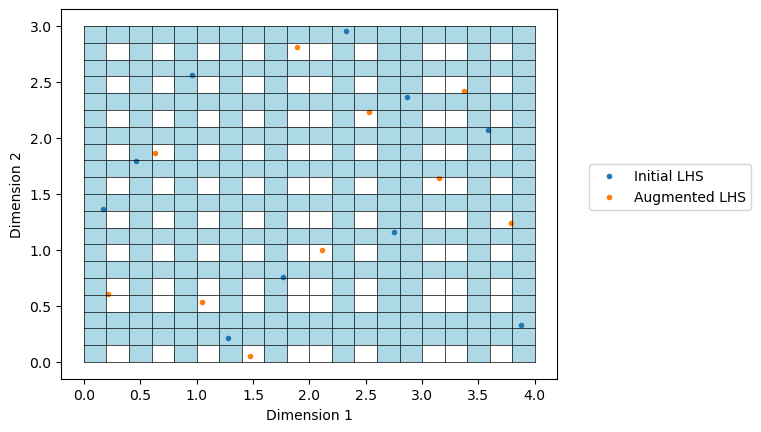

In [2]:
new = num #Points to be added

new_num = new+num
x_new = sampling.expand_lhs(x,  new, method='basic')


### For visualization only
intervals = []  
subspace_bool = []
for i in range(len(xlimits)):  
    intervals.append(np.linspace(xlimits[i][0],xlimits[i][1],new_num+1))
    subspace_bool.append([[intervals[i][j]<x[kk][i]<intervals[i][j+1] 
    for kk in range(len(x))] for j in range(len(intervals[i])-1)])
    
    
fig, ax = plt.subplots(1)
ax.plot(x[:, PLOT1], x[:, PLOT2], ".")
ax.plot(x_new[len(x):, PLOT1], x_new[len(x):, PLOT2], ".")
for i in range(len(intervals[0])):
    ax.plot([intervals[PLOT1][i], intervals[PLOT1][i]], [intervals[PLOT2][0],intervals[PLOT2][-1]], linewidth=0.5,color='k')
    ax.plot([intervals[PLOT1][0], intervals[PLOT1][-1]], [intervals[PLOT2][i],intervals[PLOT2][i]], linewidth=0.5,color='k')
ax.set_xlabel("Dimension " + str(PLOT1+1))
ax.set_ylabel("Dimension " + str(PLOT2+1))

i=PLOT1
for j in range(len(subspace_bool[i])):
    if True in subspace_bool[i][j]:
        ax.add_patch(patches.Rectangle((intervals[PLOT1][j], intervals[PLOT2][0]), 
        (intervals[PLOT1][1]-intervals[PLOT1][0]), (intervals[PLOT2][-1]-intervals[PLOT2][0]),facecolor='lightblue'))

i=PLOT2
for j in range(len(subspace_bool[i])):
    if True in subspace_bool[i][j]:
        ax.add_patch(patches.Rectangle((intervals[PLOT1][0], intervals[PLOT2][j]), 
        (intervals[PLOT1][-1]-intervals[PLOT1][0]), (intervals[PLOT2][1]-intervals[PLOT2][0]),facecolor='lightblue'))
        
ax.legend(['Initial LHS','Augmented LHS'],bbox_to_anchor = (1.05, 0.6))
plt.show() 

## Augmented Sampling - Optimization ESE

Then, we expand our LHS sampling (10 points) by adding another 10 points. In this case, we try to optimize the augmented LHS using the Enhanced Stochastic Evolutionary algorithm (ESE).

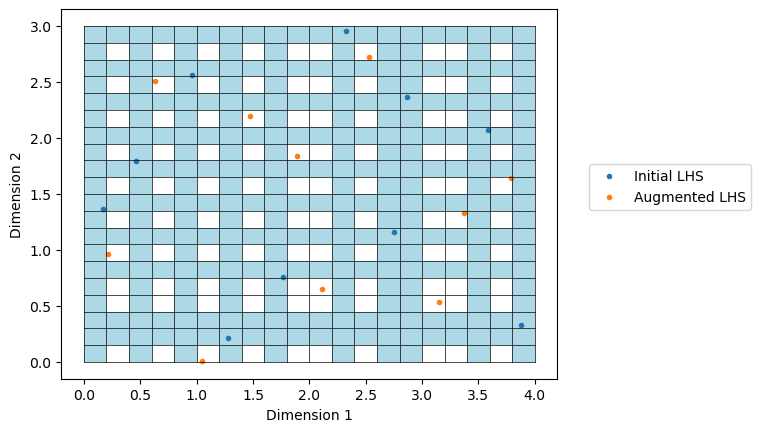

In [3]:
new = num #Points to be added

new_num = new+num
x_new = sampling.expand_lhs(x,  new, method='ese')


### For visualization only
intervals = []  
subspace_bool = []
for i in range(len(xlimits)):  
    intervals.append(np.linspace(xlimits[i][0],xlimits[i][1],new_num+1))
    subspace_bool.append([[intervals[i][j]<x[kk][i]<intervals[i][j+1] 
    for kk in range(len(x))] for j in range(len(intervals[i])-1)])
    
    
fig, ax = plt.subplots(1)
ax.plot(x[:, PLOT1], x[:, PLOT2], ".")
ax.plot(x_new[len(x):, PLOT1], x_new[len(x):, PLOT2], ".")
for i in range(len(intervals[0])):
    ax.plot([intervals[PLOT1][i], intervals[PLOT1][i]], [intervals[PLOT2][0],intervals[PLOT2][-1]], linewidth=0.5,color='k')
    ax.plot([intervals[PLOT1][0], intervals[PLOT1][-1]], [intervals[PLOT2][i],intervals[PLOT2][i]], linewidth=0.5,color='k')
ax.set_xlabel("Dimension " + str(PLOT1+1))
ax.set_ylabel("Dimension " + str(PLOT2+1))

i=PLOT1
for j in range(len(subspace_bool[i])):
    if True in subspace_bool[i][j]:
        ax.add_patch(patches.Rectangle((intervals[PLOT1][j], intervals[PLOT2][0]), 
        (intervals[PLOT1][1]-intervals[PLOT1][0]), (intervals[PLOT2][-1]-intervals[PLOT2][0]),facecolor='lightblue'))

i=PLOT2
for j in range(len(subspace_bool[i])):
    if True in subspace_bool[i][j]:
        ax.add_patch(patches.Rectangle((intervals[PLOT1][0], intervals[PLOT2][j]), 
        (intervals[PLOT1][-1]-intervals[PLOT1][0]), (intervals[PLOT2][1]-intervals[PLOT2][0]),facecolor='lightblue'))
       
ax.legend(['Initial LHS','Augmented LHS'],bbox_to_anchor = (1.05, 0.6))
plt.show() 

## Augmented Sampling for mixed integer variables

In [4]:
from smt.utils.design_space import (
    DesignSpace,
    FloatVariable,
    IntegerVariable,
    OrdinalVariable,
    CategoricalVariable,
)
from smt.applications.mixed_integer import MixedIntegerSamplingMethod


In [5]:
design_space = DesignSpace(
            [
                CategoricalVariable(["6,7", "3,7", "4,6", "3,4"]),
                IntegerVariable(0, 1),
                FloatVariable(0, 100),
            ]
        )


In [6]:
sampling = MixedIntegerSamplingMethod(LHS, design_space, criterion="ese", random_state=42)
n_doe = 5
Xt = sampling(n_doe)
n_add = 10
x_new = sampling.expand_lhs(Xt, n_add, method="ese")

In [7]:
print('Initial DOE \n', Xt)

Initial DOE 
 [[ 2.          0.         67.32723687]
 [ 1.          1.         50.49512863]
 [ 2.          1.         39.39819704]
 [ 0.          0.         80.92900825]
 [ 3.          0.          3.11989041]]


In [8]:
print('Expand DOE \n', x_new)

Expand DOE 
 [[ 0.          0.         51.20707681]
 [ 0.          1.         29.85512515]
 [ 2.          1.         69.37809697]
 [ 2.          0.         15.3675912 ]
 [ 1.          1.         95.12575685]
 [ 1.          0.         47.66738419]
 [ 1.          0.         70.928392  ]
 [ 3.          0.         86.7619275 ]
 [ 3.          1.          1.61037191]
 [ 2.          1.         38.59810412]]


In [14]:
#to give the initial doe in the initial space from integer encoding
print('Initial DOE in the initial space (labels) from integer encoding: ')

doe_in_enum_space = []
for i in range(n_doe):
    xx=design_space.decode_values(Xt[i])
    print(xx)
    doe_in_enum_space.append(xx)   
    print("Doe point  i={} ={}".format((i),doe_in_enum_space[i]  ),'\n')   
    
#or without a loop
print('Without a loop: ',design_space.decode_values(Xt))

Initial DOE in the initial space (labels) from integer encoding: 
['4,6', 0.0, 67.32723686587384]
Doe point  i=0 =['4,6', 0.0, 67.32723686587384] 

['3,7', 1.0, 50.49512863264476]
Doe point  i=1 =['3,7', 1.0, 50.49512863264476] 

['4,6', 1.0, 39.39819704323989]
Doe point  i=2 =['4,6', 1.0, 39.39819704323989] 

['6,7', 0.0, 80.92900825439996]
Doe point  i=3 =['6,7', 0.0, 80.92900825439996] 

['3,4', 0.0, 3.1198904067240534]
Doe point  i=4 =['3,4', 0.0, 3.1198904067240534] 

Without a loop:  [['4,6', 0.0, 67.32723686587384], ['3,7', 1.0, 50.49512863264476], ['4,6', 1.0, 39.39819704323989], ['6,7', 0.0, 80.92900825439996], ['3,4', 0.0, 3.1198904067240534]]
